# 50_startups problem:
**This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.**

## content:
1. Data analysis & visualization
2. Data preprocessing
    -  Data Cleaning or Cleansing
    -  Work with Missing data
    - Work with Categorical data
    - Detect and Handle Outliers
    - Split data to Train and Test Sets
    - Feature Scaling
3. Machine Learnin model
4. Calculate mean square error
5. Test Model on custom data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 1. Data analysis & visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


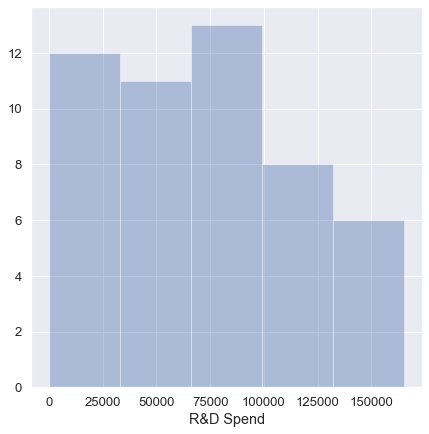

In [5]:
sns.distplot(df['R&D Spend'],kde=False)

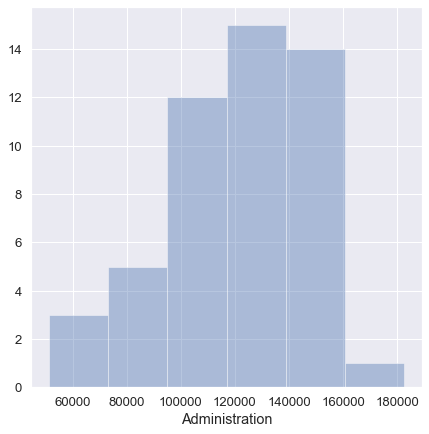

In [6]:
sns.distplot(df['Administration'],kde=False)

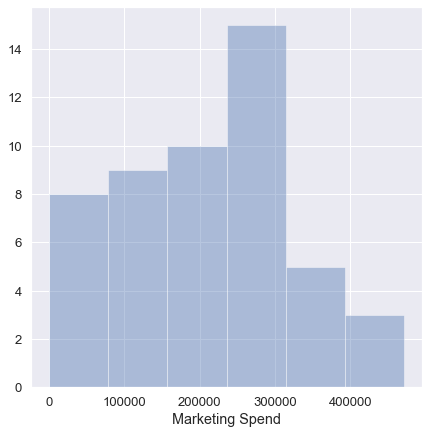

In [7]:
sns.distplot(df['Marketing Spend'],kde=False)

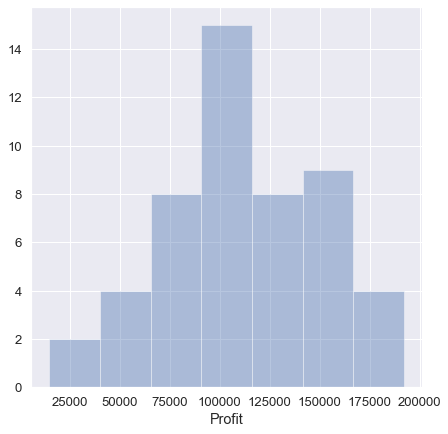

In [8]:
sns.distplot(df['Profit'],kde=False)

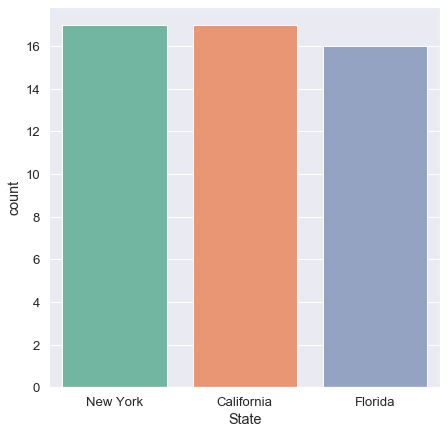

In [9]:
sns.countplot(df['State'],palette='Set2')

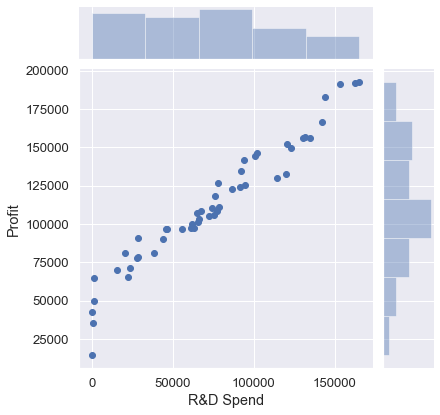

In [10]:
sns.jointplot(x='R&D Spend',y='Profit',data=df)

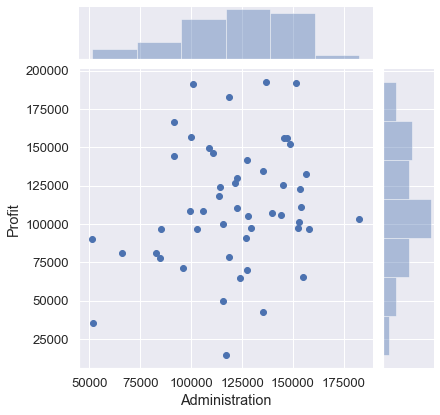

In [11]:
sns.jointplot(x='Administration',y='Profit',data=df)

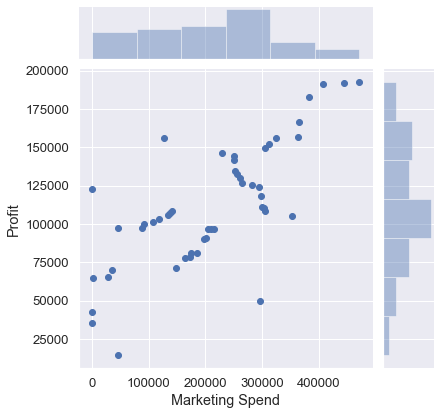

In [12]:
sns.jointplot(x='Marketing Spend',y='Profit',data=df)

### Data Cleaning or Cleansing

In [13]:
df.isnull().sum() # there is no missing data

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Work with Categorical data

In [14]:
df=pd.get_dummies(df,columns=['State'],drop_first=True)

In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Split data to Train and Test Sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df.drop('Profit',axis=1)


In [18]:
y=df['Profit']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(x_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 1.46590835, -1.42103369,  1.22361995,  1.52752523, -0.73379939],
       [-1.20660348, -2.51888968, -0.19440892, -0.65465367,  1.36277029],
       [-0.80469045, -1.78389628, -0.27487842, -0.65465367, -0.73379939],
       [-0.20182903,  2.51640342, -0.72051149,  1.52752523, -0.73379939],
       [-1.65019404, -0.31678357, -1.29253446, -0.65465367, -0.73379939],
       [-0.68383666, -3.15164903, -0.10219311, -0.65465367, -0.73379939],
       [ 0.42542994,  0.89541257,  0.56835911, -0.65465367,  1.36277029],
       [-0.64120747, -1.69478014, -0.03565735, -0.65465367,  1.36277029],
       [ 0.4080322 ,  0.12922129,  0.31176354,  1.52752523, -0.73379939],
       [ 1.20695826,  0.91493627,  0.89211189,  1.52752523, -0.73379939]])

### Machine Learning

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_predict=model.predict(x_test)

In [27]:
model.score(x_train,y_train)

0.9632441496219079

In [28]:
model.score(x_test,y_test)

0.8969836394865045

### Calculate mean square error


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
np.sqrt(mean_squared_error(y_test, y_predict))

13492.036734866366

### Test Model on custom data

In [35]:
x_train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

In [37]:
lst=[112456,12456,13213,1,0]
lst=scaler.transform([lst])
lst

array([[ 0.81571947, -4.82697037, -1.54305661,  1.52752523, -0.73379939]])

In [39]:
model.predict(lst)

array([50458.43173695])